In [1]:
import pyarrow.dataset as ds
import pyarrow.parquet as pq
import pandas as pd

base_path = "/home/hygo2025/Documents/data/processed_data/enriched_events"



In [2]:
dataset = ds.dataset(base_path, format="parquet", partitioning="hive")
cols_to_drop = ["unified_user_id", "listing_id", "user_id", "anonymous_id"]

all_cols = dataset.schema.names
cols_to_keep = [c for c in all_cols if c not in cols_to_drop]

table = dataset.to_table(columns=cols_to_keep)

rename_map = {
    "listing_id_numeric": "listing_id",
    "user_numeric_id": "user_id"
}
for old_name, new_name in rename_map.items():
    if old_name in table.column_names:
        table = table.rename_columns([
            new_name if c == old_name else c
            for c in table.column_names
        ])

first_cols = ["user_id", "listing_id", "name_raw", "event_type"]
rest_cols = [c for c in table.column_names if c not in first_cols]
new_order = first_cols + rest_cols
table = table.select(new_order)

df = table.to_pandas()

print(df.shape)
print(df.columns.tolist())
df.head()


(19126387, 22)
['user_id', 'listing_id', 'name_raw', 'event_type', 'browser_family', 'os_family', 'collector_timestamp', 'business_type', 'event_ts', 'state', 'city', 'neighborhood', 'price', 'usable_areas', 'total_areas', 'bathrooms', 'bedrooms', 'suites', 'parking_spaces', 'amenities', 'geopoint', 'dt']


,user_id,listing_id,name_raw,event_type,browser_family,os_family,collector_timestamp,business_type,event_ts,state,...,price,usable_areas,total_areas,bathrooms,bedrooms,suites,parking_spaces,amenities,geopoint,dt
0,103,1450584,ListingRendered,VISIT,Chrome Mobile,Android,1706800846835,SALE,2024-02-01 15:20:46.835,bahia,...,387000.0,57.0,57.0,2.0,2.0,0.0,1.0,"['KITCHEN', 'ELEVATOR', 'GATED_COMMUNITY']","-38.4896543,-12.9881887",2024-02-01
1,103,1450584,ListingRendered,VISIT,Chrome Mobile,Android,1706797670251,SALE,2024-02-01 14:27:50.251,bahia,...,387000.0,57.0,57.0,2.0,2.0,0.0,1.0,"['KITCHEN', 'ELEVATOR', 'GATED_COMMUNITY']","-38.4896543,-12.9881887",2024-02-01
2,304,1987731,RankingClicked,LEAD_INTENTION,Chrome Mobile,Android,1706794623317,SALE,2024-02-01 13:37:03.317,bahia,...,290000.0,2000.0,6200.0,NaN,NaN,NaN,NaN,[],"-38.0069504,-12.4844471",2024-02-01
3,304,1529573,RankingClicked,LEAD_INTENTION,Chrome Mobile,Android,1706794579394,SALE,2024-02-01 13:36:19.394,bahia,...,98000.0,868.0,868.0,NaN,0.0,NaN,NaN,['SEA_VIEW'],"-38.0069504,-12.4844471",2024-02-01
4,304,1529573,ListingRendered,VISIT,Chrome Mobile,Android,1706794583642,SALE,2024-02-01 13:36:23.642,bahia,...,98000.0,868.0,868.0,NaN,0.0,NaN,NaN,['SEA_VIEW'],"-38.0069504,-12.4844471",2024-02-01


In [3]:
df_vix = df[df["state"] == "espírito santo"]
df_vix = df[df["city"] == "vitória"]
df_vix.head()

,user_id,listing_id,name_raw,event_type,browser_family,os_family,collector_timestamp,business_type,event_ts,state,...,price,usable_areas,total_areas,bathrooms,bedrooms,suites,parking_spaces,amenities,geopoint,dt
143,1955,10211,RankingClicked,LEAD_INTENTION,None,None,1706745772248,SALE,2024-02-01 00:02:52.248,espírito santo,...,1450000.0,200.0,225.0,5.0,4.0,2.0,4.0,"['BALCONY', 'PAVED_STREET', 'BARBECUE_GRILL', ...","-40.267894,-20.2599804",2024-02-01
144,1955,10211,ListingRendered,VISIT,Chrome Mobile,Android,1706745775165,SALE,2024-02-01 00:02:55.165,espírito santo,...,1450000.0,200.0,225.0,5.0,4.0,2.0,4.0,"['BALCONY', 'PAVED_STREET', 'BARBECUE_GRILL', ...","-40.267894,-20.2599804",2024-02-01
145,1955,1292801,RankingClicked,LEAD_INTENTION,Chrome Mobile,Android,1706746103186,SALE,2024-02-01 00:08:23.186,espírito santo,...,550000.0,650000.0,NaN,1.0,2.0,0.0,4.0,"['BARBECUE_GRILL', 'GARDEN', 'ELECTRONIC_GATE'...","-40.3339751,-20.2833869",2024-02-01
146,1955,1292801,ListingRendered,VISIT,None,None,1706746105978,SALE,2024-02-01 00:08:25.978,espírito santo,...,550000.0,650000.0,NaN,1.0,2.0,0.0,4.0,"['BARBECUE_GRILL', 'GARDEN', 'ELECTRONIC_GATE'...","-40.3339751,-20.2833869",2024-02-01
147,1955,500391,ListingRendered,VISIT,None,None,1706746009609,SALE,2024-02-01 00:06:49.609,espírito santo,...,2700000.0,850.0,1000.0,6.0,5.0,2.0,8.0,"['DINNER_ROOM', 'PAVED_STREET', 'COPA', 'KITCH...","-40.3269799,-20.3071309",2024-02-01


In [4]:
df_vix.columns

Index(['user_id', 'listing_id', 'name_raw', 'event_type', 'browser_family',
       'os_family', 'collector_timestamp', 'business_type', 'event_ts',
       'state', 'city', 'neighborhood', 'price', 'usable_areas', 'total_areas',
       'bathrooms', 'bedrooms', 'suites', 'parking_spaces', 'amenities',
       'geopoint', 'dt'],
      dtype='object')

### Análise Exploratória de Dados (EDA)

In [5]:
unique_listings = df_vix["listing_id"].nunique()
unique_listings

20937

In [6]:
unique_users = df_vix["user_id"].nunique()
unique_users

137256

In [7]:
unique_events = df_vix["name_raw"].nunique()
unique_events

5

In [8]:
unique_neighborhoods = df_vix["neighborhood"].nunique()
unique_neighborhoods

73

In [9]:
# Quantidade de eventos por bairro
events_per_neighborhood = df_vix.groupby("neighborhood").size().reset_index(name='event_count').sort_values(by='event_count', ascending=False)
events_per_neighborhood.head(10)

,neighborhood,event_count
34,jardim camburi,1391814
35,jardim da penha,657931
51,praia do canto,591685
41,mata da praia,425300
6,bento ferreira,372473
19,enseada do suá,282481
4,barro vermelho,235489
59,santa lúcia,138240
10,centro,115118
57,santa helena,107191


In [10]:
events_by_type_and_neighborhood = (
    df_vix
    .groupby(["neighborhood", "name_raw"])
    .size()
    .reset_index(name="event_count")
    .pivot_table(
        index="neighborhood",
        columns="name_raw",
        values="event_count",
        fill_value=0
    )
)

events_by_type_and_neighborhood["total_events"] = events_by_type_and_neighborhood.sum(axis=1)
events_by_type_and_neighborhood = events_by_type_and_neighborhood.sort_values("total_events", ascending=False)

events_by_type_and_neighborhood = events_by_type_and_neighborhood.reset_index()
events_by_type_and_neighborhood.head(10)

name_raw,neighborhood,FavoriteClicked,LeadClicked,LeadPanelClicked,ListingRendered,RankingClicked,total_events
0,jardim camburi,5183.0,6806.0,996657.0,228033.0,155135.0,1391814.0
1,jardim da penha,2439.0,3435.0,443395.0,124989.0,83673.0,657931.0
2,praia do canto,2097.0,2315.0,410552.0,105142.0,71579.0,591685.0
3,mata da praia,1071.0,1165.0,323830.0,58213.0,41021.0,425300.0
4,bento ferreira,1032.0,1346.0,287036.0,49906.0,33153.0,372473.0
5,enseada do suá,683.0,1080.0,232300.0,29133.0,19285.0,282481.0
6,barro vermelho,529.0,700.0,188148.0,27471.0,18641.0,235489.0
7,santa lúcia,649.0,612.0,101122.0,21873.0,13984.0,138240.0
8,centro,862.0,1141.0,40024.0,43202.0,29889.0,115118.0
9,santa helena,314.0,311.0,85692.0,12774.0,8100.0,107191.0


In [11]:
cols = ['listing_id', 'business_type', 'price', 'usable_areas', 'total_areas',
        'bathrooms', 'bedrooms', 'suites', 'parking_spaces']

df_num = df_vix[cols]

df_num = (
    df_vix.groupby('listing_id')
    .agg({
        'price': 'mean',          # média de preço
        'usable_areas': 'first',   # ou média, se variar
        'total_areas': 'first',
        'bathrooms': 'first',
        'bedrooms': 'first',
        'suites': 'first',
        'parking_spaces': 'first',
        'business_type': 'first'
    })
    .reset_index()
)

df_num.sort_values('listing_id', ascending=True).head(10)


,listing_id,price,usable_areas,total_areas,bathrooms,bedrooms,suites,parking_spaces,business_type
0,93,279250.0,85.0,85.0,3.0,3.0,1.0,1.0,SALE
1,333,690000.0,68.0,68.0,1.0,2.0,1.0,1.0,SALE
2,348,700000.0,60.0,60.0,2.0,2.0,1.0,2.0,SALE
3,479,2600000.0,213.0,213.0,1.0,4.0,2.0,3.0,SALE
4,602,737200.0,80.0,80.0,1.0,2.0,0.0,2.0,SALE
5,695,2950000.0,247.0,1344.0,4.0,4.0,2.0,4.0,SALE
6,793,1199000.0,70.0,70.0,2.0,2.0,1.0,2.0,SALE
7,818,950000.0,140.0,NaN,4.0,4.0,1.0,2.0,SALE
8,853,2490200.0,132.0,132.0,1.0,3.0,0.0,3.0,SALE
9,1159,1290000.0,110.0,110.0,3.0,3.0,3.0,2.0,SALE


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter

def plot_distribution(df, column, category_col=None, category_val=None, bins=100):
    data = df.copy()
    if category_col and category_val:
        data = data[data[category_col] == category_val]

    data = data[data[column].notnull() & (data[column] > 0)]
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    sns.histplot(data=data, x=column, kde=True, bins=bins, ax=axs[0])
    axs[0].set_title(f'Distribuição de {column} (Escala Normal)', fontsize=13)
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequência')

    sns.histplot(data=data, x=column, kde=True, bins=bins, log_scale=True, ax=axs[1])
    axs[1].set_title(f'Distribuição de {column} (Escala Logarítmica)', fontsize=13)
    axs[1].set_xlabel(column)
    axs[1].set_ylabel('Frequência')

    axs[1].xaxis.set_major_locator(LogLocator(base=10.0))
    axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

    plt.tight_layout()
    plt.show()


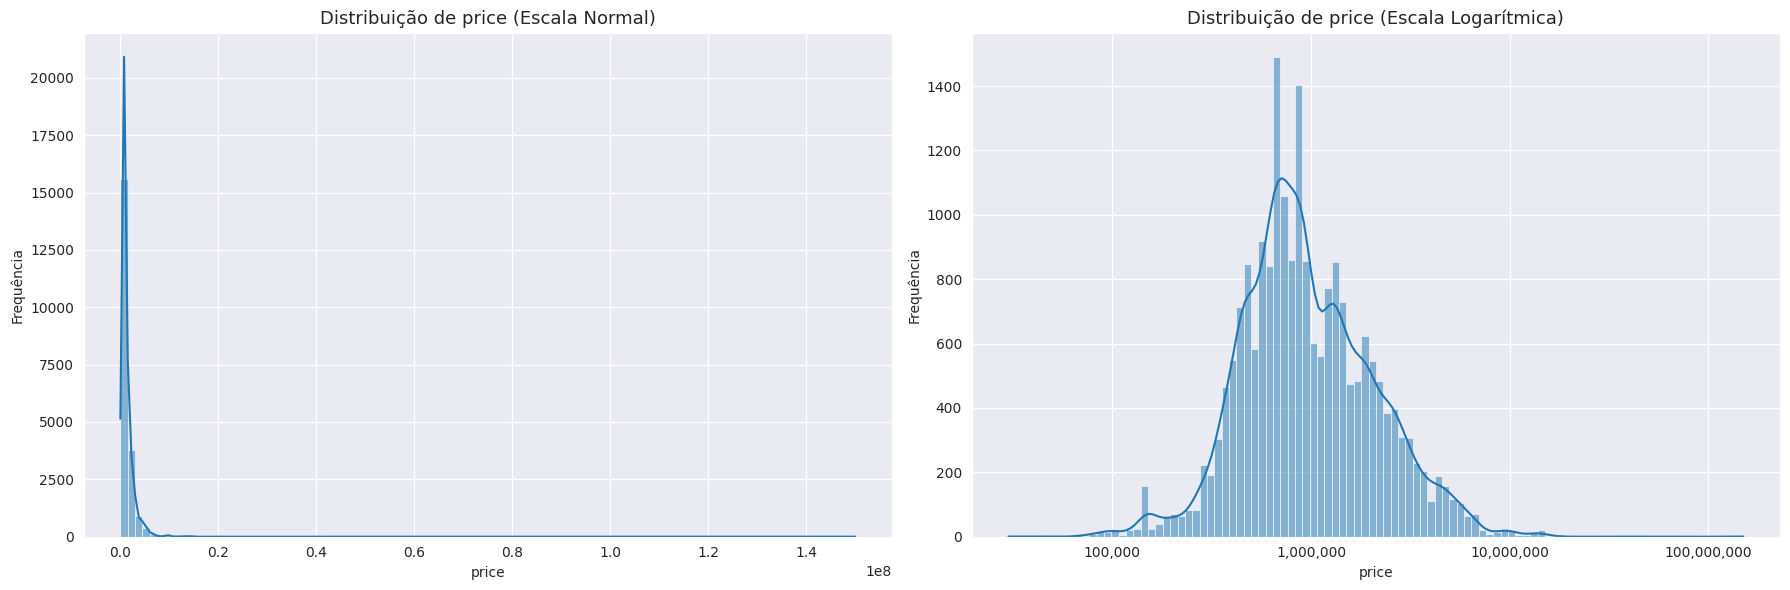

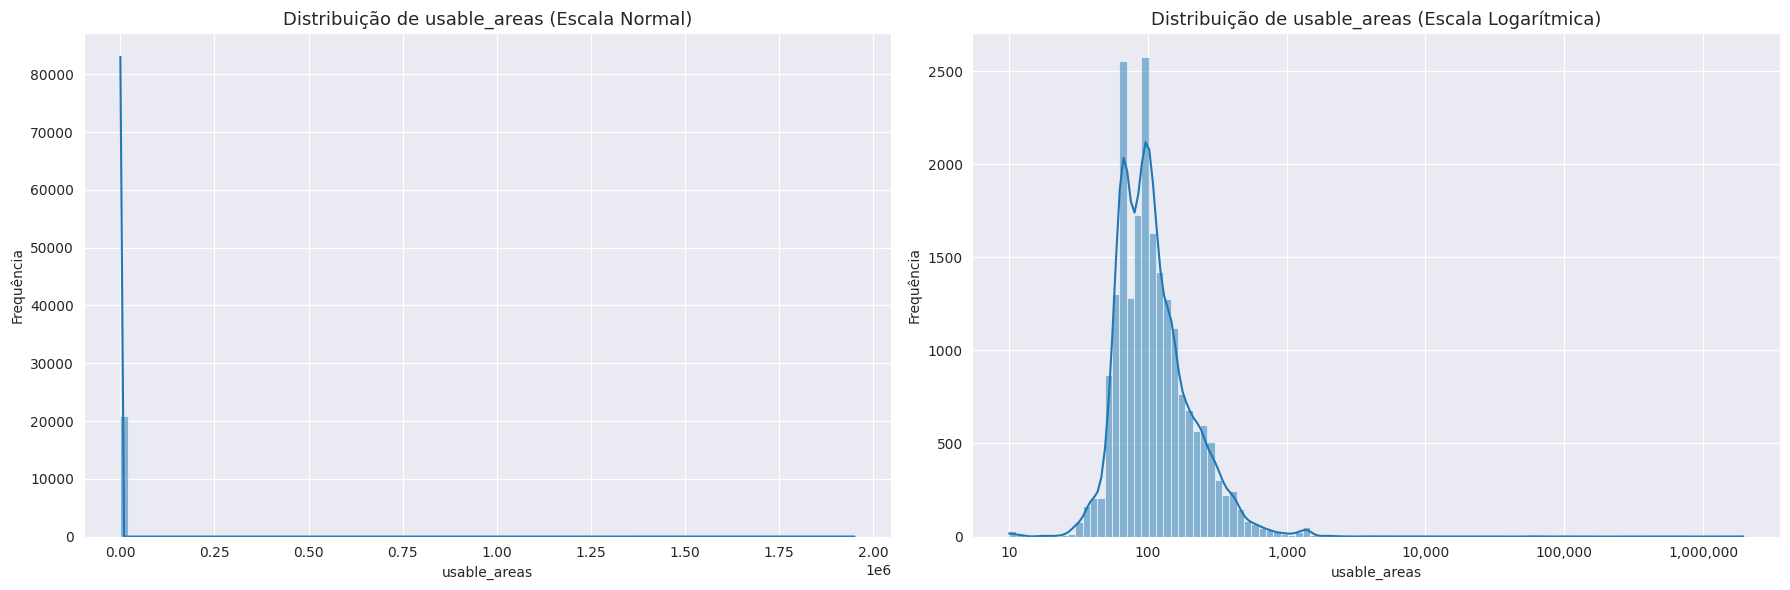

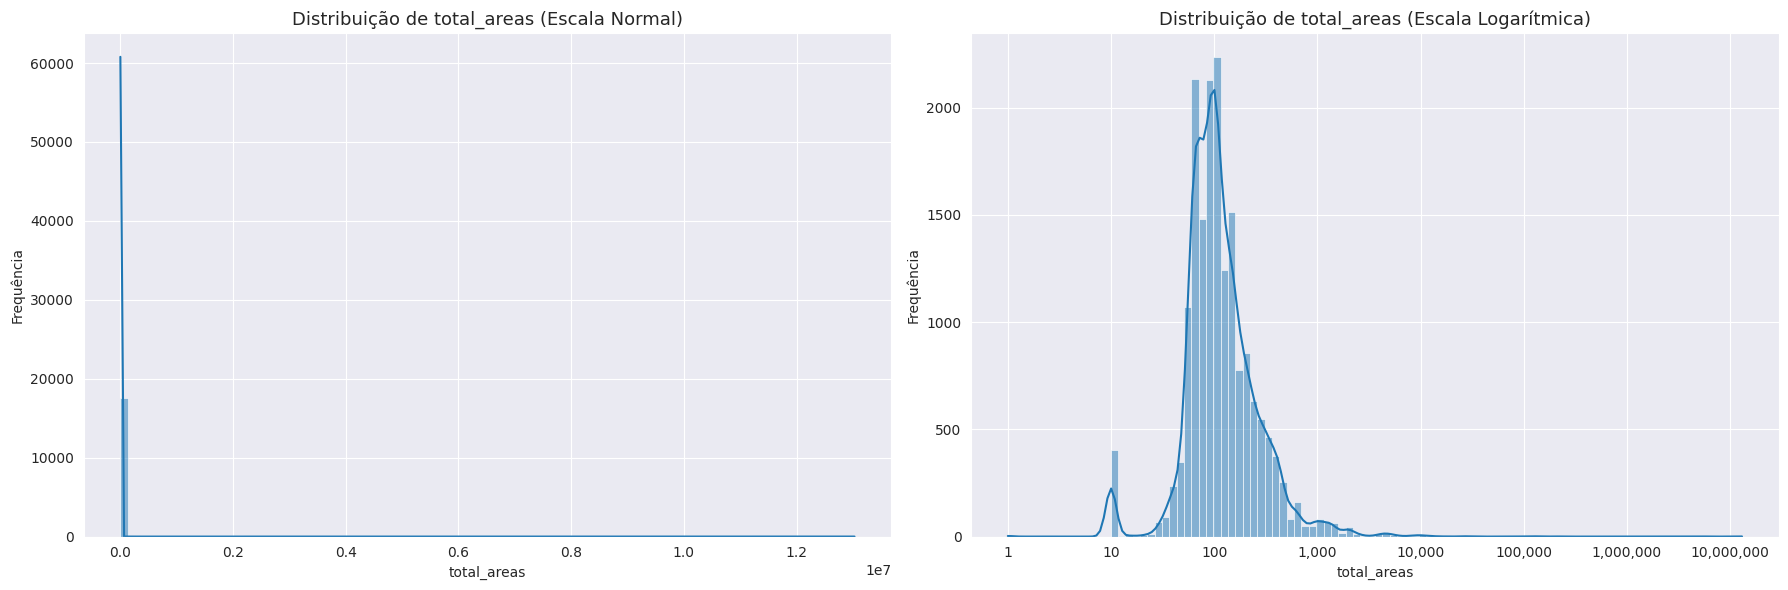

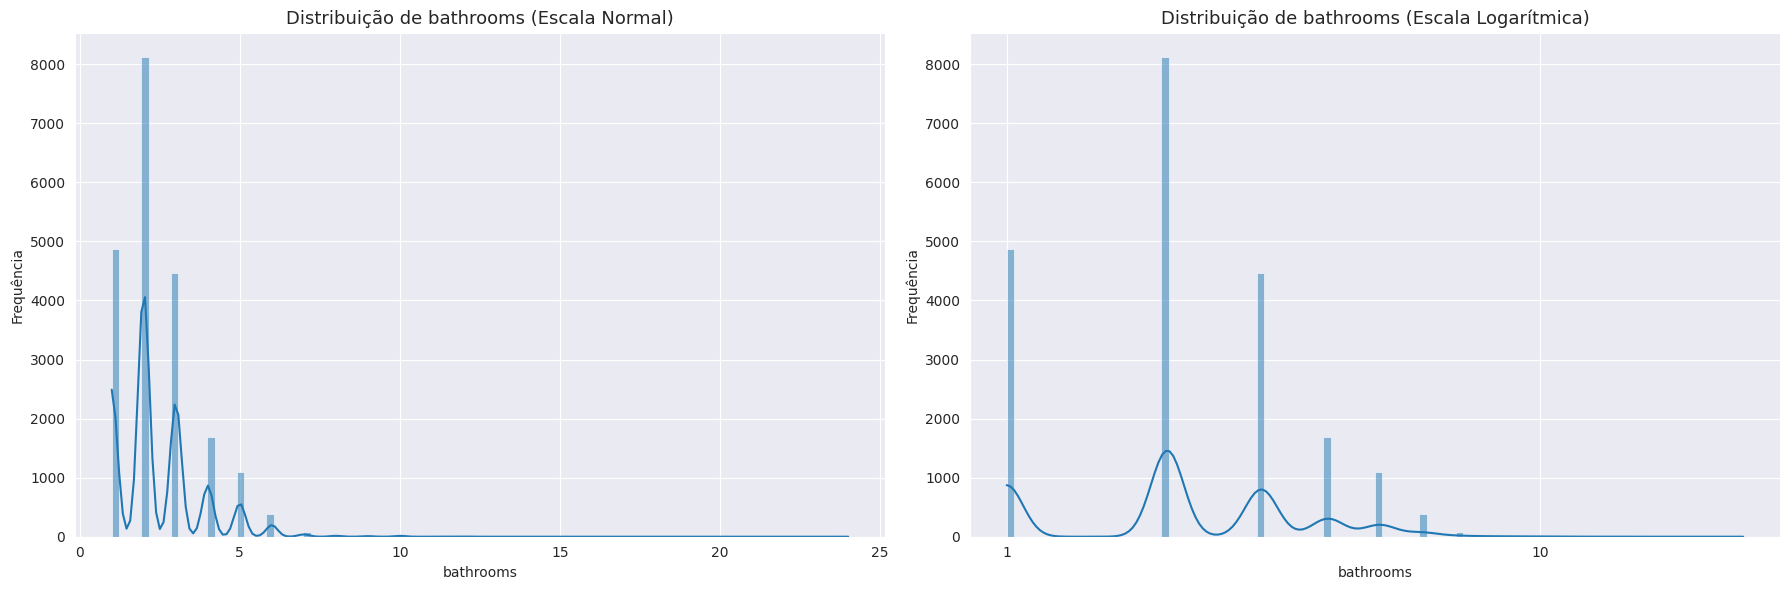

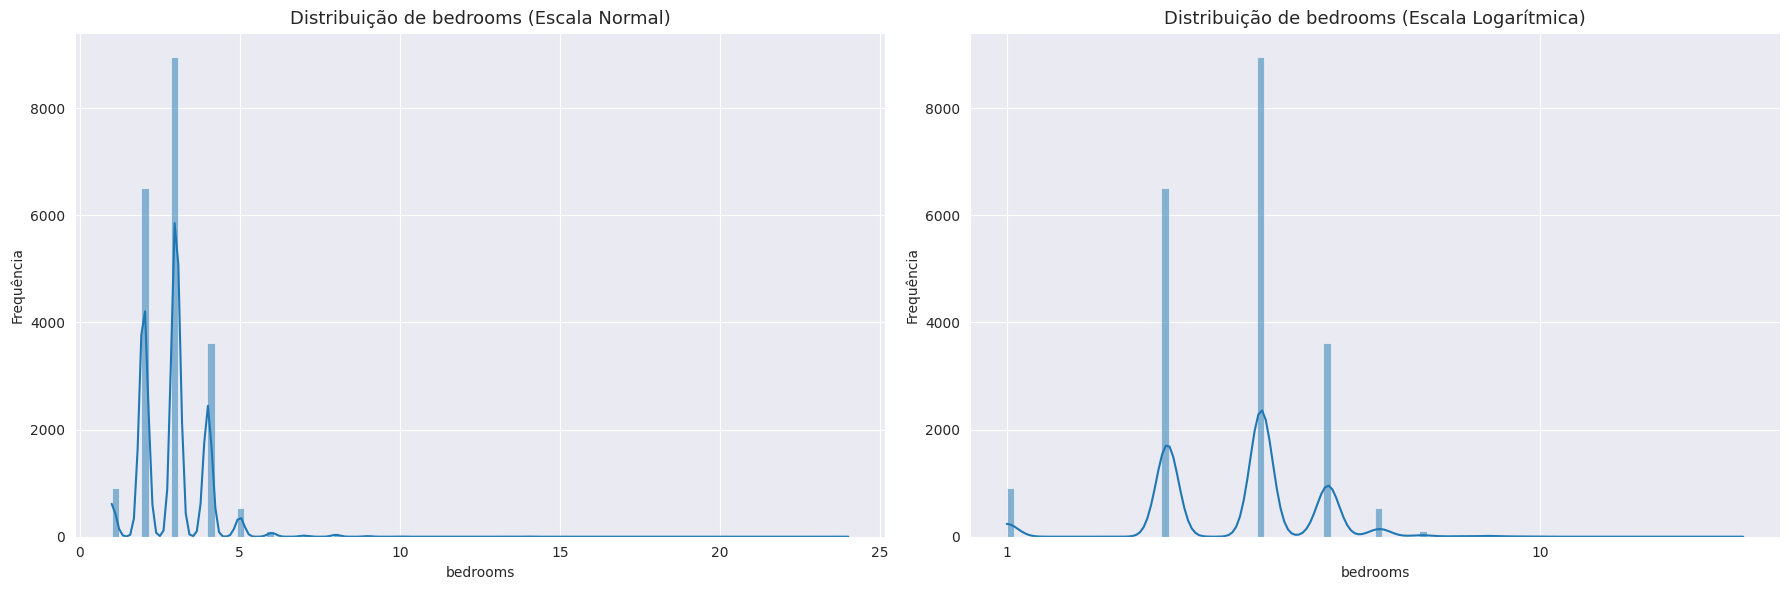

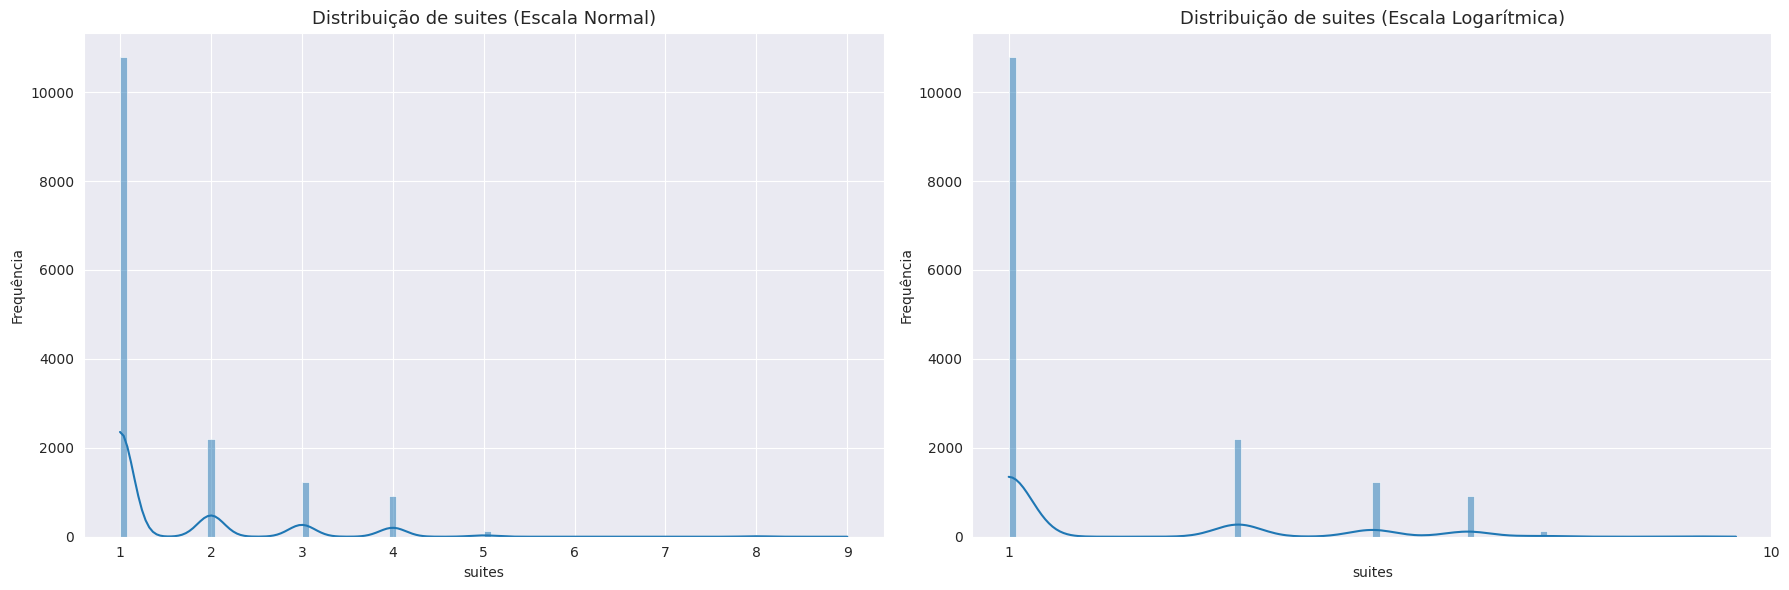

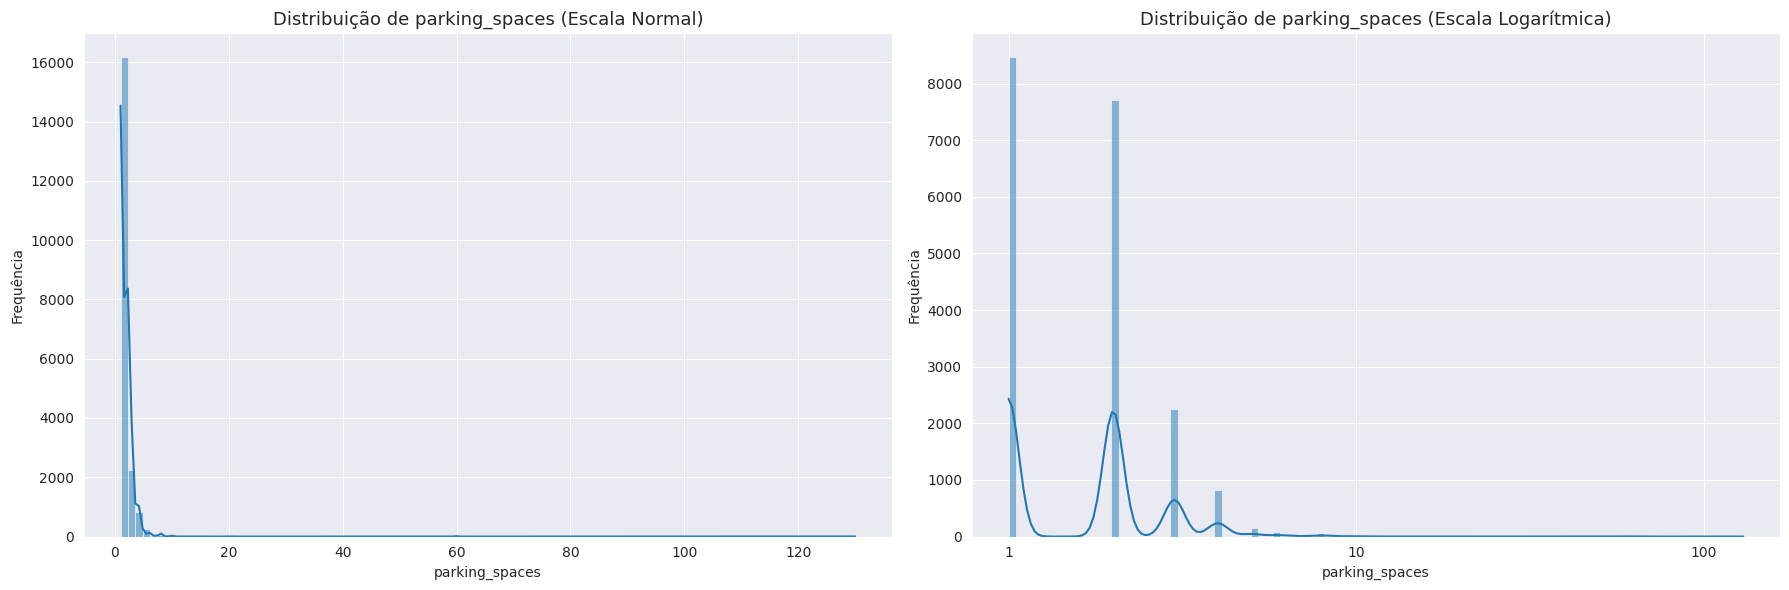

In [13]:
cols = ['price', 'usable_areas', 'total_areas', 'bathrooms', 'bedrooms', 'suites', 'parking_spaces']

for col in cols:
    plot_distribution(df_num, column=col, category_col='business_type', category_val='SALE')


In [14]:
df_feat_caract = df_num[['bedrooms', 'bathrooms' , 'parking_spaces', 'total_areas', 'usable_areas']].copy()
df_feat_caract.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,bedrooms,bathrooms,parking_spaces,total_areas,usable_areas
count,20917.00000,20916.00000,20490.00000,17594.00000,20937.00000
mean,2.84649,2.41198,1.81298,1264.86797,281.88680
std,1.02049,1.31860,2.16099,106169.85138,14266.17345
min,0.00000,0.00000,0.00000,1.00000,0.00000
25%,2.00000,2.00000,1.00000,71.00000,70.00000
50%,3.00000,2.00000,2.00000,103.00000,100.00000
75%,3.00000,3.00000,2.00000,170.00000,150.00000
max,24.00000,24.00000,130.00000,13029060.00000,1950000.00000


<Axes: xlabel='usable_areas'>

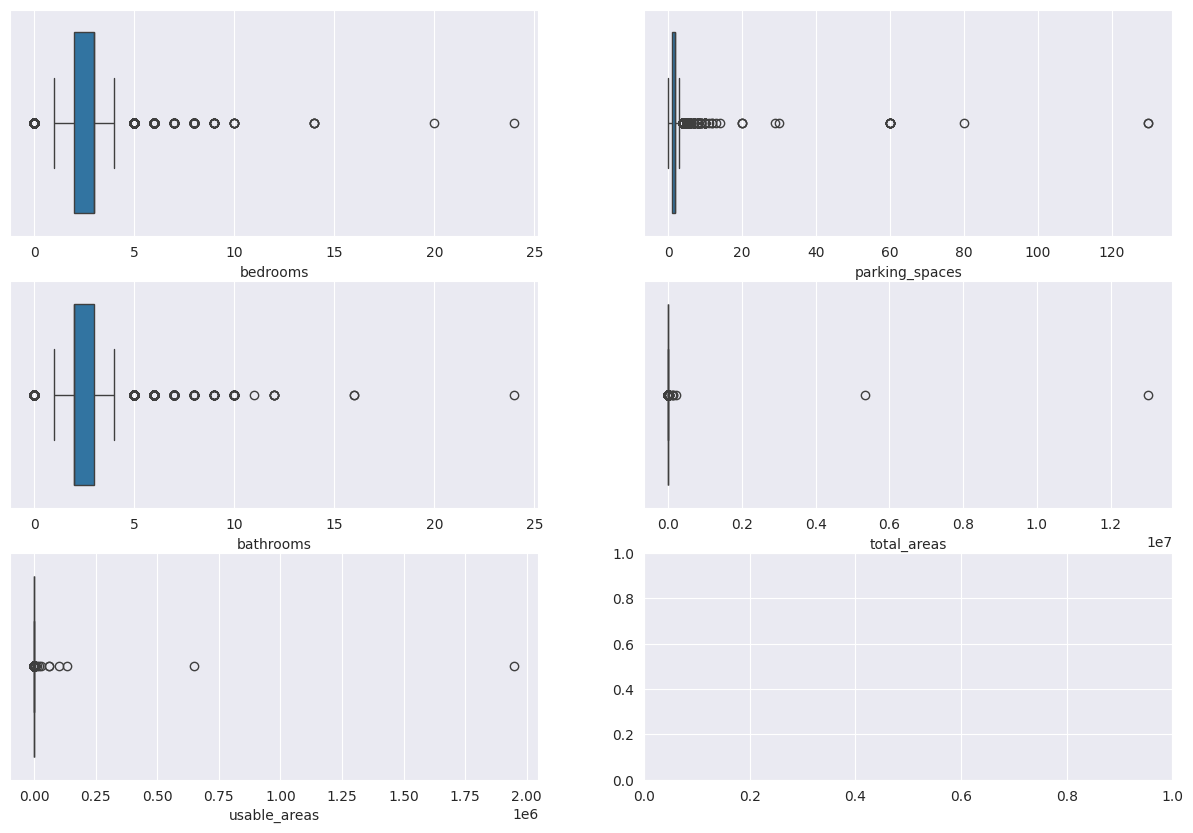

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))#, sharey=True)

sns.boxplot(x=df_feat_caract["bedrooms"], ax=axs[0, 0])
sns.boxplot(x=df_feat_caract["bathrooms"], ax=axs[1, 0])
sns.boxplot(x=df_feat_caract["parking_spaces"], ax=axs[0, 1])
sns.boxplot(x=df_feat_caract["total_areas"], ax=axs[1, 1])
sns.boxplot(x=df_feat_caract["usable_areas"], ax=axs[2, 0])

In [16]:
df_feat_caract.nunique()

bedrooms           14
bathrooms          15
parking_spaces     21
total_areas       650
usable_areas      523
dtype: int64